In [1]:
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib
import jieba

In [2]:
f = open('sanguo.txt', 'r', encoding='utf-8')

## 分词

In [3]:
lines=[]
for line in f:
    temp = jieba.lcut(line)
    words = []
    for i in temp:
        i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+", "", i)
        if len(i) > 0:
            words.append(i)
    if len(words) > 0:
        lines.append(words)
print(lines[0:5])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Savarus\AppData\Local\Temp\jieba.cache
Loading model cost 0.885 seconds.
Prefix dict has been built successfully.


[['三国演义', '上卷'], ['罗贯中'], ['滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红'], ['白发', '渔樵', '江渚上', '惯看', '秋月春风', '一壶', '浊酒', '喜相逢', '古今', '多少', '事', '都', '付笑谈', '中'], ['--', '调寄', '临江仙']]


## 模型训练

In [4]:
model = Word2Vec(lines, vector_size=20, window=2, min_count=3, epochs=7, negative=10, sg=1)
print('孔明的词向量：\n', model.wv.get_vector('孔明'))
print('\n和孔明相关性最高的前20个词语')
model.wv.most_similar('孔明', topn=20)

孔明的词向量：
 [-0.02905961  0.03659729  0.3338539  -0.5043439   0.6587692   0.19423445
  0.6306565   1.0159428  -0.64952576  0.7467488   0.29082745  0.21313426
  0.31740284 -0.7011301   1.1897535   0.63736856 -0.27839544  0.00831318
 -0.93429464 -0.4517505 ]

和孔明相关性最高的前20个词语


[('孙权', 0.8777355551719666),
 ('玄德', 0.8723872900009155),
 ('使者', 0.8683565855026245),
 ('成都', 0.8572828769683838),
 ('门吏', 0.8558325171470642),
 ('陆逊', 0.8463415503501892),
 ('钟会', 0.845542311668396),
 ('洛阳', 0.8429608941078186),
 ('二嫂', 0.8357128500938416),
 ('鲁肃', 0.8356315493583679),
 ('关公', 0.834627091884613),
 ('庞统', 0.8346099257469177),
 ('刘璋', 0.834271252155304),
 ('袁术', 0.8337399363517761),
 ('密书', 0.8324644565582275),
 ('孙夫人', 0.8317813277244568),
 ('楙', 0.8275802135467529),
 ('具说', 0.8269597887992859),
 ('周瑜', 0.8266180753707886),
 ('后主', 0.8258411884307861)]

## 可视化

In [5]:
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.index_to_key):
    rawWordVec.append(model.wv[w])
    word2ind[w] = i
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

In [6]:
rawWordVec

array([[-0.5496654 ,  0.19286145,  0.13875447, ..., -0.43636757,
        -1.2813503 , -0.88685143],
       [-0.28385738,  1.2957132 ,  0.18576513, ..., -0.41108024,
        -0.93272364, -0.8693401 ],
       [-0.36544472,  0.96262646,  0.06339517, ..., -0.17481427,
        -1.0676147 , -0.7287837 ],
       ...,
       [-0.00200715,  0.2525542 , -0.18185608, ..., -0.40962118,
        -0.47041395, -0.35386854],
       [-0.07644258,  0.30402553, -0.26396093, ..., -0.4154185 ,
        -0.4672104 , -0.3040413 ],
       [-0.11485764,  0.32577872, -0.25305   , ..., -0.3888882 ,
        -0.5563705 , -0.23408733]], dtype=float32)

In [7]:
X_reduced

array([[-1.3893540e+00,  4.9284719e-02],
       [-8.2737505e-01,  7.0245795e-02],
       [-1.1553340e+00, -1.9857747e-02],
       ...,
       [-1.1706519e-03, -1.6507469e-01],
       [ 1.6272852e-01, -2.2955960e-01],
       [ 2.1189985e-01, -1.8657692e-01]], dtype=float32)

## 绘制二维图

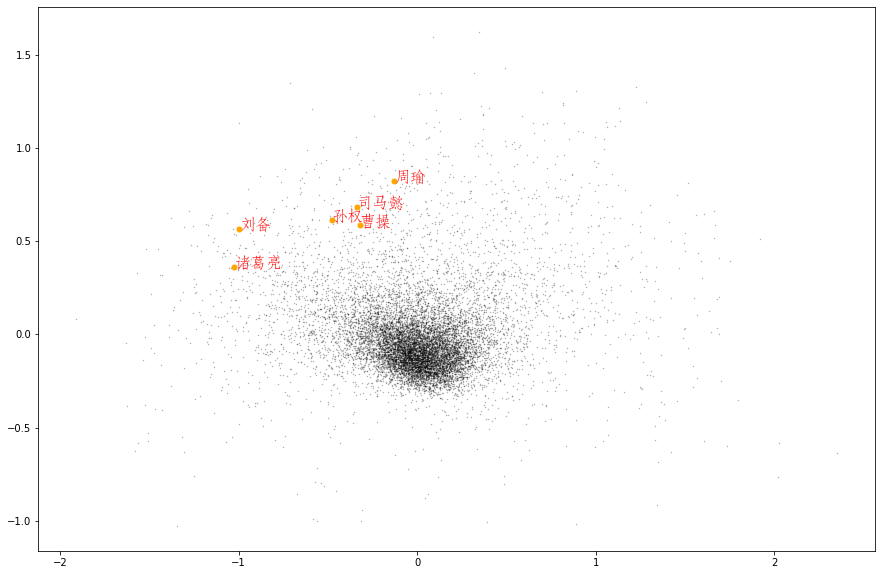

In [8]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize=1, alpha=0.3, color='black')

words = ['孙权', '刘备', '曹操', '周瑜', '诸葛亮', '司马懿', '汉献帝']

zhfont1 = matplotlib.font_manager.FontProperties(fname='./华文仿宋.ttf', size=16)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha=1, color='orange', markersize=10)
        plt.text(xy[0], xy[1], w, fontproperties=zhfont1, alpha=1, color='red')

## 类比关系

In [9]:
words = model.wv.most_similar(positive=['玄德', '曹操'], negative=['孔明'])
words

[('司马懿', 0.9126521944999695),
 ('袁绍', 0.8229314088821411),
 ('东吴', 0.821502149105072),
 ('曹真', 0.8162439465522766),
 ('袁术', 0.8160036206245422),
 ('吕布', 0.8133695125579834),
 ('雍州', 0.8030989766120911),
 ('细作', 0.8015720844268799),
 ('孙权', 0.7977930903434753),
 ('周瑜', 0.7966325283050537)]

In [10]:
words = model.wv.most_similar(positive=['曹操', '蜀'], negative=['魏'])
words

[('袁绍', 0.7503156661987305),
 ('司马懿', 0.7147071957588196),
 ('孙权', 0.7049388885498047),
 ('冀州', 0.6976742744445801),
 ('刘表', 0.6871775388717651),
 ('东吴', 0.6869019865989685),
 ('孙坚', 0.6788561344146729),
 ('五路', 0.6774276494979858),
 ('钟会', 0.6648590564727783),
 ('荆州', 0.6565057039260864)]